In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.decomposition import KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

data=pd.read_csv("./microbes.csv")
data

,Unnamed: 0,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,...,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi,microorganisms
0,0,10.70,15.8,5.43,3.75,0.7850,8.14,2.15,22.3,2.97,...,2.97,1.340,1.610,0.683,0.1950,3.63,12.10,1.310,7.99,Spirogyra
1,1,5.60,18.3,4.14,6.16,0.3640,3.51,18.60,22.5,5.41,...,5.47,1.520,1.520,1.010,0.2150,6.01,20.60,0.765,7.99,Spirogyra
2,2,8.32,19.8,4.63,6.66,0.4150,5.85,21.00,22.4,5.96,...,5.96,1.630,1.380,1.110,0.1820,6.55,11.50,0.953,7.99,Spirogyra
3,3,10.10,17.9,7.29,11.10,1.4700,6.30,9.94,21.9,8.81,...,8.88,2.040,2.120,0.715,0.3710,10.30,12.00,2.340,7.99,Spirogyra
4,4,6.27,20.2,20.10,10.70,14.7000,3.97,2.58,11.9,10.20,...,10.20,7.780,6.210,6.800,4.4400,14.00,9.55,17.600,7.99,Spirogyra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30522,30522,3.01,22.6,4.90,20.00,0.4340,1.40,19.90,22.1,18.10,...,18.60,4.350,1.350,1.710,0.5490,19.10,13.20,1.070,7.15,Ulothrix
30523,30523,5.19,22.6,2.07,19.40,0.0788,1.67,5.09,22.8,19.20,...,20.00,1.460,0.411,0.458,0.0597,19.80,17.20,0.197,7.15,Ulothrix
30524,30524,9.21,22.7,2.07,21.00,0.0790,5.81,12.70,22.8,20.10,...,20.10,1.060,0.257,0.319,0.0341,20.70,11.60,0.198,7.15,Ulothrix
30525,30525,8.21,22.6,1.87,20.50,0.0641,5.96,11.30,22.8,20.20,...,20.20,1.010,0.285,0.350,0.0314,20.80,20.40,0.162,7.15,Ulothrix


In [121]:
# Clear data
data = data.drop(['Unnamed: 0'], axis = 1)

In [122]:
data.shape

(30527, 25)

In [123]:
data

,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,...,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi,microorganisms
0,10.70,15.8,5.43,3.75,0.7850,8.14,2.15,22.3,2.97,10.90,...,2.97,1.340,1.610,0.683,0.1950,3.63,12.10,1.310,7.99,Spirogyra
1,5.60,18.3,4.14,6.16,0.3640,3.51,18.60,22.5,5.41,19.20,...,5.47,1.520,1.520,1.010,0.2150,6.01,20.60,0.765,7.99,Spirogyra
2,8.32,19.8,4.63,6.66,0.4150,5.85,21.00,22.4,5.96,10.20,...,5.96,1.630,1.380,1.110,0.1820,6.55,11.50,0.953,7.99,Spirogyra
3,10.10,17.9,7.29,11.10,1.4700,6.30,9.94,21.9,8.81,10.70,...,8.88,2.040,2.120,0.715,0.3710,10.30,12.00,2.340,7.99,Spirogyra
4,6.27,20.2,20.10,10.70,14.7000,3.97,2.58,11.9,10.20,1.22,...,10.20,7.780,6.210,6.800,4.4400,14.00,9.55,17.600,7.99,Spirogyra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30522,3.01,22.6,4.90,20.00,0.4340,1.40,19.90,22.1,18.10,9.92,...,18.60,4.350,1.350,1.710,0.5490,19.10,13.20,1.070,7.15,Ulothrix
30523,5.19,22.6,2.07,19.40,0.0788,1.67,5.09,22.8,19.20,16.20,...,20.00,1.460,0.411,0.458,0.0597,19.80,17.20,0.197,7.15,Ulothrix
30524,9.21,22.7,2.07,21.00,0.0790,5.81,12.70,22.8,20.10,11.40,...,20.10,1.060,0.257,0.319,0.0341,20.70,11.60,0.198,7.15,Ulothrix
30525,8.21,22.6,1.87,20.50,0.0641,5.96,11.30,22.8,20.20,20.20,...,20.20,1.010,0.285,0.350,0.0314,20.80,20.40,0.162,7.15,Ulothrix


In [124]:
#Null check
data.isnull().sum()

Solidity           0
Eccentricity       0
EquivDiameter      0
Extrema            0
FilledArea         0
Extent             0
Orientation        0
EulerNumber        0
BoundingBox1       0
BoundingBox2       0
BoundingBox3       0
BoundingBox4       0
ConvexHull1        0
ConvexHull2        0
ConvexHull3        0
ConvexHull4        0
MajorAxisLength    0
MinorAxisLength    0
Perimeter          0
ConvexArea         0
Centroid1          0
Centroid2          0
Area               0
raddi              0
microorganisms     0
dtype: int64

In [125]:
#No missing values for this dataset
data.isnull().sum().sum()

0

In [126]:
#Visualize the data
microorganisms = data['microorganisms'].unique()
microorganisms_counts = data.groupby(['microorganisms']).size()
print(microorganisms)

['Spirogyra' 'Volvox' 'Pithophora' 'Yeast' 'Raizopus' 'Penicillum'

 'Aspergillus sp' 'Protozoa' 'Diatom' 'Ulothrix']


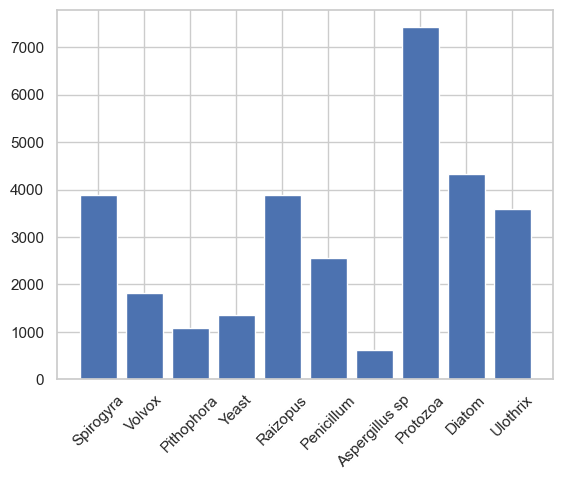

In [127]:
plt.bar(microorganisms,microorganisms_counts)
plt.xticks(rotation=45)
plt.show()

In [128]:
data= data[data.microorganisms !='Spirogyra']
data= data[data.microorganisms !='Penicillum']
data= data[data.microorganisms !='Pithophora']

In [129]:
microorganisms = data['microorganisms'].unique()
microorganisms_counts = data.groupby(['microorganisms']).size()
microorganisms.sort()
print(microorganisms)

['Aspergillus sp' 'Diatom' 'Protozoa' 'Raizopus' 'Ulothrix' 'Volvox'

 'Yeast']


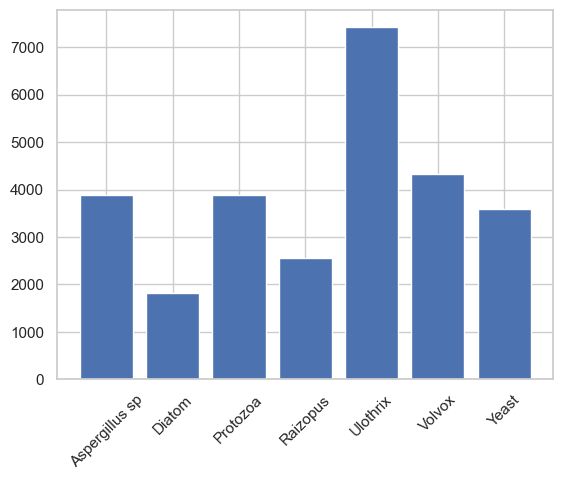

In [130]:
#plot the microbes and balance the data
plt.bar(microorganisms,microorganisms_counts)
plt.xticks(rotation=45)
plt.show()

In [131]:
data['microorganisms'].value_counts()

Ulothrix          7420
Volvox            4320
Aspergillus sp    3888
Protozoa          3888
Yeast             3600
Raizopus          2552
Diatom            1818
Name: microorganisms, dtype: int64

In [132]:
#Applying undersampling
def undersampling(microCount, k=1818):
  if len(microCount) < k:
    return microCount
  return microCount.sample(k)

In [133]:
data_undersampled = data.groupby('microorganisms').apply(undersampling).reset_index(drop=True)
data_undersampled ['microorganisms'].value_counts()

Aspergillus sp    1818
Diatom            1818
Protozoa          1818
Raizopus          1818
Ulothrix          1818
Volvox            1818
Yeast             1818
Name: microorganisms, dtype: int64

In [134]:
data_undersampled

,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,...,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi,microorganisms
0,12.20,14.9,0.886,2.78,0.0154,9.380,3.91,23.0,2.68,12.700,...,2.68,0.206,0.256,0.0939,0.00513,2.59,12.70,0.039,1.51,Aspergillus sp
1,4.97,22.7,5.580,9.51,0.5480,2.690,12.30,21.8,3.38,4.780,...,3.56,4.040,1.020,1.6300,0.43600,5.74,5.40,1.380,7.35,Aspergillus sp
2,9.71,22.8,2.230,17.70,0.0891,3.850,13.00,22.9,15.80,11.500,...,16.00,1.320,0.248,0.3040,0.03740,16.70,11.90,0.228,5.68,Aspergillus sp
3,6.12,22.7,3.750,7.44,0.2590,2.090,6.22,22.6,7.04,11.500,...,7.04,2.330,0.605,0.6560,0.16300,8.39,12.80,0.630,10.70,Aspergillus sp
4,12.30,20.0,2.720,15.30,0.1390,6.840,15.70,22.7,14.50,20.900,...,14.50,0.785,0.631,0.4080,0.04360,14.80,21.50,0.336,1.23,Aspergillus sp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12721,5.16,22.2,4.020,7.82,0.2840,2.080,18.90,22.6,5.64,12.300,...,5.67,2.700,1.140,0.8790,0.22100,6.77,15.40,0.722,4.50,Yeast
12722,14.40,16.3,3.030,20.00,0.1840,10.100,3.26,22.7,19.90,9.980,...,19.90,0.632,0.736,0.3290,0.04580,20.10,10.60,0.413,5.32,Yeast
12723,10.50,16.6,3.940,20.60,0.2810,7.230,20.90,22.0,19.60,19.200,...,19.90,0.967,1.110,0.8500,0.10600,20.30,20.20,0.695,8.76,Yeast
12724,14.60,22.5,3.770,15.50,0.2810,5.850,19.10,22.6,14.50,0.658,...,14.60,1.390,0.491,0.4550,0.06980,15.00,1.77,0.637,3.98,Yeast


In [135]:
data_undersampled= data_undersampled.sample(frac = 1)
data_undersampled

,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,...,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi,microorganisms
1899,6.65,22.60,4.070,5.88,0.30900,2.48,16.50,22.2,3.48,15.50,...,3.48,2.160,0.6940,1.1300,0.17600,4.66,17.20,0.7400,7.65,Diatom
2468,4.12,5.82,6.110,3.77,0.97000,2.84,2.31,21.9,3.34,13.90,...,3.34,1.950,3.1300,2.0600,0.62700,5.16,16.90,1.6500,6.43,Diatom
11097,17.20,20.70,3.560,13.30,0.25200,8.10,17.40,22.7,12.60,15.70,...,12.60,0.867,0.6200,0.3240,0.05280,13.00,16.40,0.5670,5.06,Yeast
11607,15.30,21.80,3.930,9.34,0.28900,8.07,8.00,22.8,8.98,7.02,...,8.98,1.090,0.5580,0.3650,0.07230,9.70,7.56,0.6900,5.00,Yeast
8733,8.73,15.90,1.690,13.90,0.05200,6.13,11.40,22.9,13.70,9.46,...,13.70,0.455,0.5410,0.3600,0.02420,13.80,9.82,0.1330,1.83,Ulothrix
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2509,7.78,22.40,5.550,15.50,0.67400,4.05,13.90,22.0,12.60,5.09,...,12.60,2.410,0.9210,1.2500,0.27800,14.70,6.25,1.3600,8.93,Diatom
7241,13.90,20.70,0.457,6.24,0.00475,8.59,4.63,23.0,6.30,19.80,...,6.30,0.126,0.0816,0.0408,0.00135,6.14,19.80,0.0117,4.43,Raizopus
12198,12.90,19.80,3.140,15.70,0.21000,8.91,8.64,22.8,15.60,21.70,...,15.70,0.760,0.6350,0.3570,0.05510,16.10,22.10,0.4450,4.09,Yeast
4561,10.10,21.10,4.310,5.48,0.42400,7.63,12.20,21.7,3.90,20.20,...,3.91,1.350,0.8810,1.0400,0.13100,4.93,20.80,0.8290,2.23,Protozoa


In [136]:
microorganisms = data_undersampled['microorganisms'].unique()
microorganisms_counts = data_undersampled.groupby(['microorganisms']).size()
print(microorganisms)

['Diatom' 'Yeast' 'Ulothrix' 'Aspergillus sp' 'Protozoa' 'Volvox'

 'Raizopus']


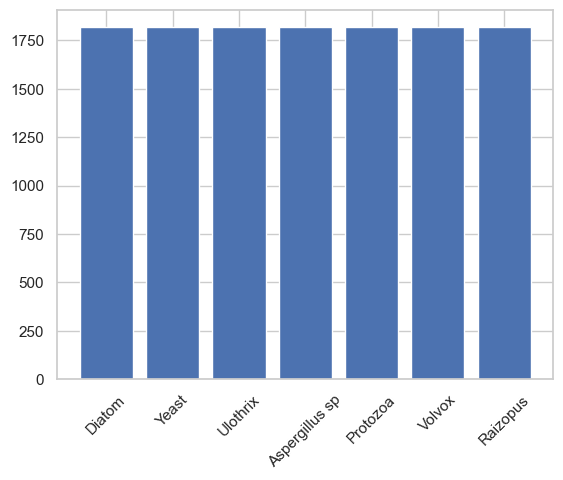

In [137]:
plt.bar(microorganisms,microorganisms_counts)
plt.xticks(rotation=45)
plt.show()

In [138]:
#Split data
X=data_undersampled[data_undersampled.columns[:-1]] 
y=data_undersampled['microorganisms']

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.6,test_size=0.4,random_state = 0)

In [140]:
scaler = MinMaxScaler(feature_range=(0,1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

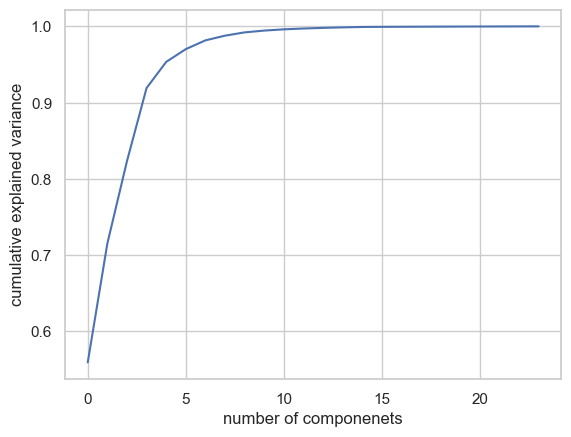

None

,cumulative explained variance,explained_variance_ratio
0,0.559415,0.559415
1,0.715240,0.155825
2,0.823246,0.108005
3,0.919140,0.095894
4,0.953379,0.034240
5,0.970142,0.016762
6,0.981634,0.011492
7,0.987791,0.006157
8,0.992121,0.004330
9,0.994476,0.002355


In [141]:
#Components for kpca

kpca = KernelPCA(kernel='sigmoid',n_components=24)
kpca=kpca.fit_transform(X_train)
explained_variance=np.var(kpca, axis=0 )
explained_variance_ratio=explained_variance/ np.sum(explained_variance)

sns.set(style='whitegrid')
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('number of componenets')
plt.ylabel('cumulative explained variance')
display(plt.show())

evr=explained_variance_ratio
cvr=np.cumsum(explained_variance_ratio)
kpca_df=pd.DataFrame()
kpca_df['cumulative explained variance']= cvr
kpca_df['explained_variance_ratio']= evr
display(kpca_df.head(12))

In [142]:
#To keep >= 95% of the initial information need n_components=4 

kpca=KernelPCA(n_components=4,kernel='sigmoid')
X_kpca_train=kpca.fit_transform(X_train)
X_kpca_test=kpca.transform(X_test)


In [143]:
#Grid Search linear & rbf kernel for prediction

param_grid=[{ 'C': [5,10,15],'gamma':[1,10,100], 'kernel':['rbf']},
{ 'C': [5,10,15],'gamma':[1,10,100], 'kernel':['linear']},]
grid=GridSearchCV(SVC(), param_grid, verbose=10)
grid.fit(X_kpca_train,y_train)
y_pred=grid.predict(X_kpca_test)

Fitting 5 folds for each of 18 candidates, totalling 90 fits

[CV 1/5; 1/18] START C=5, gamma=1, kernel=rbf...................................

[CV 1/5; 1/18] END ....C=5, gamma=1, kernel=rbf;, score=0.319 total time=   2.2s

[CV 2/5; 1/18] START C=5, gamma=1, kernel=rbf...................................

[CV 2/5; 1/18] END ....C=5, gamma=1, kernel=rbf;, score=0.293 total time=   2.2s

[CV 3/5; 1/18] START C=5, gamma=1, kernel=rbf...................................

[CV 3/5; 1/18] END ....C=5, gamma=1, kernel=rbf;, score=0.316 total time=   2.2s

[CV 4/5; 1/18] START C=5, gamma=1, kernel=rbf...................................

[CV 4/5; 1/18] END ....C=5, gamma=1, kernel=rbf;, score=0.302 total time=   2.2s

[CV 5/5; 1/18] START C=5, gamma=1, kernel=rbf...................................

[CV 5/5; 1/18] END ....C=5, gamma=1, kernel=rbf;, score=0.312 total time=   2.2s

[CV 1/5; 2/18] START C=5, gamma=10, kernel=rbf..................................

[CV 1/5; 2/18] END ...C=5, gamma=10,

In [144]:
grid.best_params_

{'C': 15, 'gamma': 100, 'kernel': 'rbf'}

In [145]:
print("Accuracy:",metrics.accuracy_score(y_true=y_test,y_pred=y_pred),"\n")


Accuracy: 0.44077784325279906 




In [146]:
# Components for LDA 
lda = LDA()
lda.fit(X_train, y_train)
explained_variance = lda.explained_variance_ratio_
cumulative_sum = np.cumsum(explained_variance)
n_components = np.argmax(cumulative_sum >= 0.95)+1
print("Number of components needed:", n_components)

Number of components needed: 4


In [147]:
# Classify after apllying LDA
lda=LDA(n_components=4)
X_train_kpcaPluslda=lda.fit_transform(X_kpca_train,y_train)
X_test_kpcaPluslda=lda.transform(X_kpca_test)

In [148]:
#Grid Search linear & rbf kernel for prediction

param_grid=[{ 'C': [5,10,15],'gamma':[1,10,100], 'kernel':['rbf']},
{ 'C': [5,10,15],'gamma':[1,10,100], 'kernel':['linear']},]
grid=GridSearchCV(SVC(), param_grid, verbose=10)
grid.fit(X_train_kpcaPluslda,y_train)
y_pred=grid.predict(X_test_kpcaPluslda)

Fitting 5 folds for each of 18 candidates, totalling 90 fits

[CV 1/5; 1/18] START C=5, gamma=1, kernel=rbf...................................

[CV 1/5; 1/18] END ....C=5, gamma=1, kernel=rbf;, score=0.646 total time=   1.9s

[CV 2/5; 1/18] START C=5, gamma=1, kernel=rbf...................................

[CV 2/5; 1/18] END ....C=5, gamma=1, kernel=rbf;, score=0.645 total time=   2.0s

[CV 3/5; 1/18] START C=5, gamma=1, kernel=rbf...................................

[CV 3/5; 1/18] END ....C=5, gamma=1, kernel=rbf;, score=0.633 total time=   2.0s

[CV 4/5; 1/18] START C=5, gamma=1, kernel=rbf...................................

[CV 4/5; 1/18] END ....C=5, gamma=1, kernel=rbf;, score=0.652 total time=   1.9s

[CV 5/5; 1/18] START C=5, gamma=1, kernel=rbf...................................

[CV 5/5; 1/18] END ....C=5, gamma=1, kernel=rbf;, score=0.639 total time=   1.9s

[CV 1/5; 2/18] START C=5, gamma=10, kernel=rbf..................................

[CV 1/5; 2/18] END ...C=5, gamma=10,

In [151]:
grid.best_params_

{'C': 15, 'gamma': 100, 'kernel': 'rbf'}

In [152]:
print("Accuracy:",metrics.accuracy_score(y_true=y_test,y_pred=y_pred),"\n")

Accuracy: 0.9178943233156551 


